# Student Scores Prediction With Machine Learning And Data Science 
## Created And Done By "Anubhav Kumar Gupta"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('score_updated.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37
95,8.0,84


In [5]:
df.shape

(96, 2)

In [6]:
df.size

192

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated(subset=['Hours', 'Scores'],keep=False)]

,Hours,Scores
43,3.7,37
94,3.7,37


In [13]:
df.drop_duplicates(subset=['Hours', 'Scores'],keep='first',inplace=True)

In [14]:
df[df.duplicated(subset=['Hours', 'Scores'],keep=False)]

,Hours,Scores


In [16]:
df[(df['Hours']==3.7)&(df['Scores']==37)]

,Hours,Scores
43,3.7,37


In [17]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   95 non-null     float64
 1   Scores  95 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


In [19]:
df.describe()

,Hours,Scores
count,95.000000,95.000000
mean,5.284211,54.200000
std,2.511053,25.088185
min,1.000000,12.000000
25%,3.050000,30.500000
50%,5.300000,55.000000
75%,7.350000,74.500000
max,9.800000,99.000000


In [20]:
df.corr()

,Hours,Scores
Hours,1.000000,0.990613
Scores,0.990613,1.000000


<AxesSubplot: >

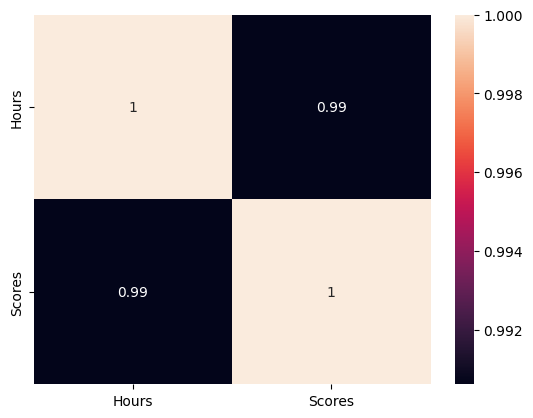

In [26]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df_sc_cor=df.corr()['Scores'].to_frame()
df_sc_cor

,Scores
Hours,0.990613
Scores,1.000000


<AxesSubplot: ylabel='Scores'>

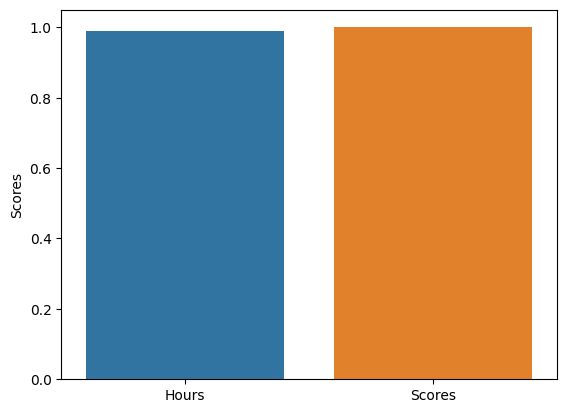

In [33]:
sns.barplot(data=df_sc_cor,x=df_sc_cor.index,y='Scores')

In [135]:
y=df['Scores']
x=df.drop(['Scores'],axis=1)

In [136]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [154]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((66, 1), (29, 1), (66,), (29,))

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model=LinearRegression()

In [157]:
model.fit(x_train,y_train)

LinearRegression()

In [158]:
model.score(x_train,y_train)

0.9818853653963081

In [159]:
model.score(x_test,y_test)

0.9784911482198736

In [160]:
model.intercept_

3.1753285323991136

In [161]:
model.coef_

array([9.67427175])

In [162]:
y_pred=model.predict(x_test)

In [163]:
y_pred

array([68.96037643, 39.93756118, 87.34149276, 32.19814378, 27.36100791,
       95.08091016, 20.58901768, 67.99294926, 77.66722101, 42.83984271,
       41.87241553, 47.67697858, 72.83008513, 33.16557096, 46.70955141,
       37.03527966, 62.18838621, 25.42615356, 45.74212423, 16.71930898,
       89.27634711, 57.35125033, 86.37406558, 18.65416333, 81.53692971,
       60.25353186, 73.79751231, 58.31867751, 90.24377428])

In [164]:
i_d=(6.1,)

In [165]:
i_a=np.asarray(i_d)

In [166]:
i_a_r=np.reshape(i_a,(1,-1))

In [167]:
y_predict=model.predict(i_a_r)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [168]:
y_predict

array([62.18838621])

In [173]:
import pickle as pk

In [174]:
file='trained_model.sav'
pk.dump(model,open(file,'wb'))

In [175]:
pk.load(open('trained_model.sav','rb'))

LinearRegression()